<img src="https://www.python.org/static/img/python-logo.png">

# Welcome to my lessons

---

**Bo Zhang** (NAOC, <mailto:bozhang@nao.cas.cn>) will have a few lessons on python.

- These are **very useful knowledge, skills and code styles** when you use `python` to process astronomical data.
- All materials can be found on [**my github page**](https://github.com/hypergravity/cham_teaches_python).
- **jupyter notebook** (formerly named **ipython notebook**) is recommeded to use

---
These lectures are organized as below:
1. install python
2. basic syntax
3. numerical computing
4. scientific computing
5. plotting
6. astronomical data processing
7. high performance computing
8. version control


# numpy
Docs: [http://docs.scipy.org/doc/numpy/user/index.html](http://docs.scipy.org/doc/numpy/user/index.html)
# scipy
Docs: [http://docs.scipy.org/doc/scipy/reference/index.html](http://docs.scipy.org/doc/scipy/reference/index.html)

# scipy.optimize.minimize
Docs: [http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)

# optimization / minimization
![](https://upload.wikimedia.org/wikipedia/commons/7/72/Max_paraboloid.svg)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


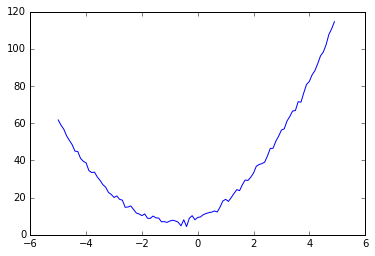

In [94]:
%pylab inline
p = [3.2, 5.6, 9.2]
x = np.arange(-5, 5, 0.1)
y = np.polyval(p, x) + np.random.randn(x.shape[0])*1.

plt.plot(x, y)

In [95]:
# STEP 1 - define your model
def my_model(p, x):
    return np.polyval(p, x)

# STEP 2 - define your cost function
def my_costfun(p, x, y):
    return np.sum((my_model(p, x) - y)**2)

In [96]:
# STEP 3 - minimize cost function

from scipy.optimize import minimize
result = minimize(my_costfun, np.array([2., 3., 5.]), args=(x,y) )

In [97]:
print result

   status: 2
  success: False
     njev: 21
     nfev: 106
 hess_inv: array([[  6.80501524e-05,  -3.15891207e-05,  -5.08402249e-04],
       [ -3.15891207e-05,   3.82008419e-04,   4.70557918e-04],
       [ -5.08402249e-04,   4.70557918e-04,   5.71949939e-03]])
      fun: 104.89106099366958
        x: array([ 3.20011421,  5.61993231,  9.22138549])
  message: 'Desired error not necessarily achieved due to precision loss.'
      jac: array([  2.19345093e-05,  -2.86102295e-06,   9.53674316e-07])
      nit: 7


In [155]:
print 'RESULT:'
print result
print ''
print ''
print 'RELATIVE ERROR:'
print (result.x - p)/p*100, '%'
print ''
print ''
print 'Hessian ERROR:' #err = sqrt(diag(inv(Hessian)))
hess_err = sqrt(diag(result['hess_inv']))
print hess_err

RESULT:
   status: 2
  success: False
     njev: 21
     nfev: 106
 hess_inv: array([[  6.80501524e-05,  -3.15891207e-05,  -5.08402249e-04],
       [ -3.15891207e-05,   3.82008419e-04,   4.70557918e-04],
       [ -5.08402249e-04,   4.70557918e-04,   5.71949939e-03]])
      fun: 104.89106099366958
        x: array([ 3.20011421,  5.61993231,  9.22138549])
  message: 'Desired error not necessarily achieved due to precision loss.'
      jac: array([  2.19345093e-05,  -2.86102295e-06,   9.53674316e-07])
      nit: 7


RELATIVE ERROR:
[ 0.00356901  0.35593406  0.23245094] %


Hessian ERROR:
[ 0.00824925  0.01954504  0.07562737]


# MCMC (emcee)
- MCMC is a convenient tool for drawing a sample from a given probability distribution.
- Therefore, is mostly used to estimate parameters in Bayesian way.
- emcee: [http://dan.iel.fm/emcee/current/#](http://dan.iel.fm/emcee/current/#)

## a simple example - draw sample from uniformly distribution

In [126]:
def lnprob(theta):
    theta = np.array(theta)
    if np.all(theta>-3.) and np.all(theta<3.):
        return 0
    return -np.inf

In [127]:
from emcee import EnsembleSampler

In [128]:
nwalkers = 10
ndim = 3
p0 = [np.random.rand(ndim) for i in range(nwalkers)]
sampler = EnsembleSampler(nwalkers, ndim, lnprob)
pos = sampler.run_mcmc(p0, 1000)

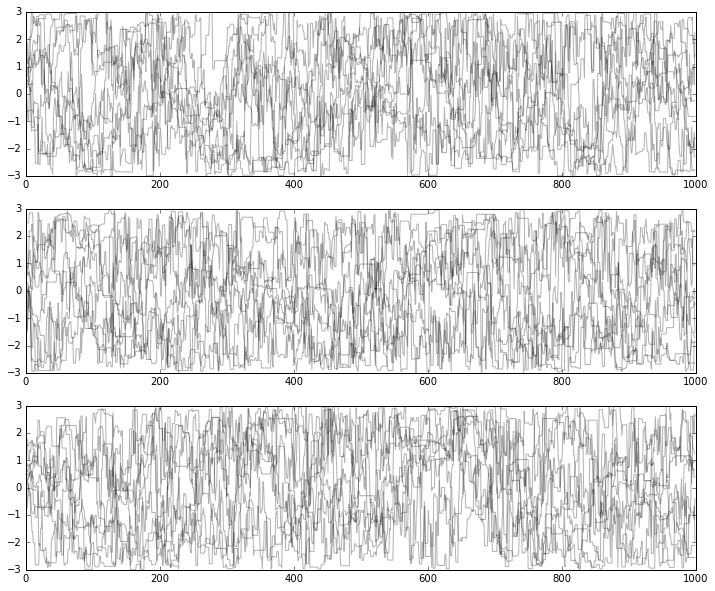

In [129]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(311)
ax.plot(sampler.chain[:,:,0].T, '-', color='k', alpha=0.3)
ax = fig.add_subplot(312)
ax.plot(sampler.chain[:,:,1].T, '-', color='k', alpha=0.3)
ax = fig.add_subplot(313)
ax.plot(sampler.chain[:,:,2].T, '-', color='k', alpha=0.3)

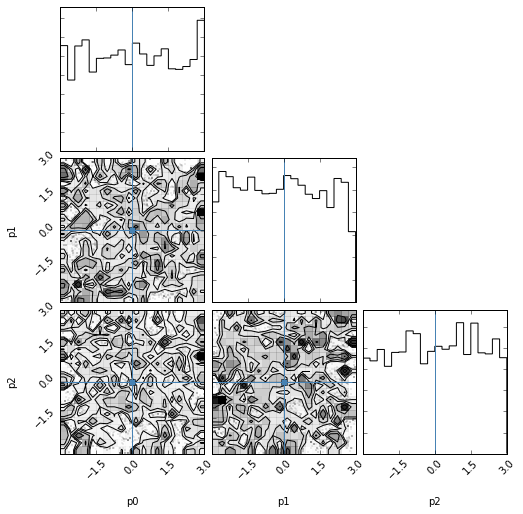

In [130]:
import corner
fig = corner.corner(sampler.flatchain, labels=["p0", "p1", "p2"],
                    truths=[0., 0., 0.])
# fig.savefig("triangle.png")

## how about Gaussian distribution?
* 1-D Gauassian

    $p(x|\mu, \sigma) \propto 
    \exp{(-\frac{(x-\mu)^2}{2\sigma^2})}$


* N-D Gauassian

    $p(\overrightarrow{x}|\overrightarrow{\mu}, \Sigma) \propto 
    \exp{(-\frac{1}{2}(\overrightarrow{x}-\overrightarrow{\mu})^T\Sigma
          (\overrightarrow{x}-\overrightarrow{\mu}))}$
          
    where $\Sigma$ is the covariance matrix

In [131]:
def lnprob(x, mu, ivar):
#     if np.all(np.abs(x)<100.):
    x = x.reshape(-1, 1)
    mu = mu.reshape(-1, 1)
    return -np.dot(np.dot((x-mu).T, ivar), x-mu)
#     else:
#         return -np.inf

In [132]:
mu = np.array([0.1, 0.2, 0.5])
cov = np.array([[1.0, 0.0, 0.0],
                [0.0, 10, 9],
                [0.0, 9, 10]])
ivar = np.linalg.inv(cov)
print ivar
print np.linalg.det(cov)
print np.linalg.det(ivar)

[[ 1.          0.          0.        ]
 [ 0.          0.52631579 -0.47368421]
 [ 0.         -0.47368421  0.52631579]]
19.0
0.0526315789474


In [133]:
nwalkers = 10
ndim = 3
p0 = [np.random.rand(ndim) for i in range(nwalkers)]
sampler = EnsembleSampler(nwalkers, ndim, lnprob, args=(mu, ivar), threads=10)
pos,prob,state = sampler.run_mcmc(p0, 2000)

In [134]:
p0

[array([ 0.19964803,  0.93685826,  0.89987023]),
 array([ 0.40018018,  0.99753074,  0.68797579]),
 array([ 0.68578061,  0.83196555,  0.81148527]),
 array([ 0.21464328,  0.72247297,  0.14755322]),
 array([ 0.85268323,  0.44067011,  0.37261661]),
 array([ 0.72196389,  0.63857272,  0.88934455]),
 array([ 0.95840968,  0.45900795,  0.49397109]),
 array([ 0.19128953,  0.96331316,  0.91830508]),
 array([ 0.33064411,  0.95651224,  0.48058038]),
 array([ 0.22200906,  0.34159156,  0.1347237 ])]

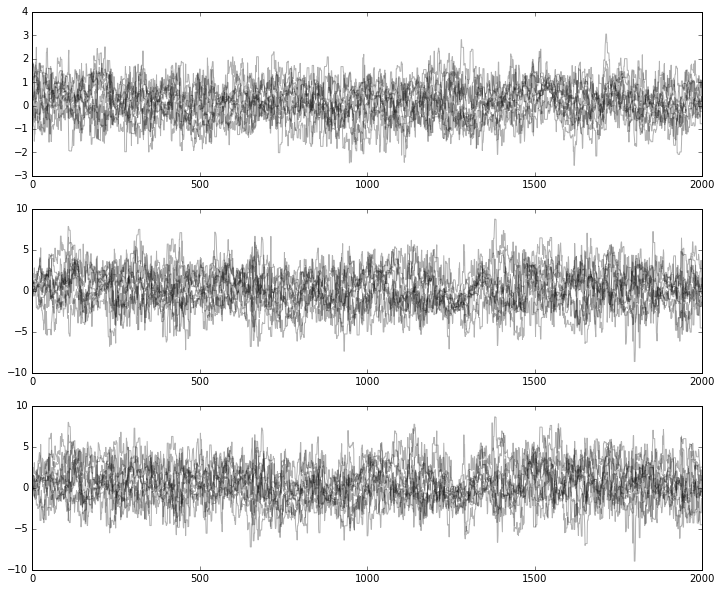

In [135]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(311)
ax.plot(sampler.chain[:,:,0].T, '-', color='k', alpha=0.3)
ax = fig.add_subplot(312)
ax.plot(sampler.chain[:,:,1].T, '-', color='k', alpha=0.3)
ax = fig.add_subplot(313)
ax.plot(sampler.chain[:,:,2].T, '-', color='k', alpha=0.3)

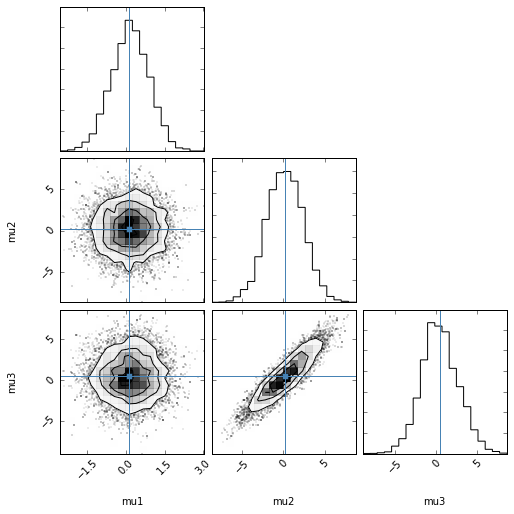

In [136]:
fig = corner.corner(sampler.flatchain, labels=["mu1", "mu2", "mu3"],
                    truths=mu)

In [137]:
print mu
print ivar

[ 0.1  0.2  0.5]
[[ 1.          0.          0.        ]
 [ 0.          0.52631579 -0.47368421]
 [ 0.         -0.47368421  0.52631579]]


## how to use MCMC to estimate model parameters?

suppose you choose a Gaussian likelihood:

$L(\theta|x_i,model) \propto \exp{(\frac{(x_i-x_{i, model})^2}{2\sigma^2})} $

$ \log{(L(\theta|x_i,model))} \propto \frac{(x_i-x_{i, model})^2}{2\sigma^2} = \frac{1}{2}{\chi^2}$


In [138]:
def lnprior(theta):
    if np.all(np.abs(theta)<10000.):
        return 0
    else:
        return -np.inf

In [139]:
def lnlike(theta, x, y):
    y_model = np.polyval(theta, x)
    return -np.sum((y_model-y)**2)

In [140]:
def lnprob(theta, x, y):
    return lnprior(theta)+lnlike(theta, x, y)

In [141]:
nwalkers = 10
ndim = 3
p0 = [np.random.rand(ndim) for i in range(nwalkers)]
sampler = EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y), threads=10)
pos,prob,state = sampler.run_mcmc(p0, 2000)

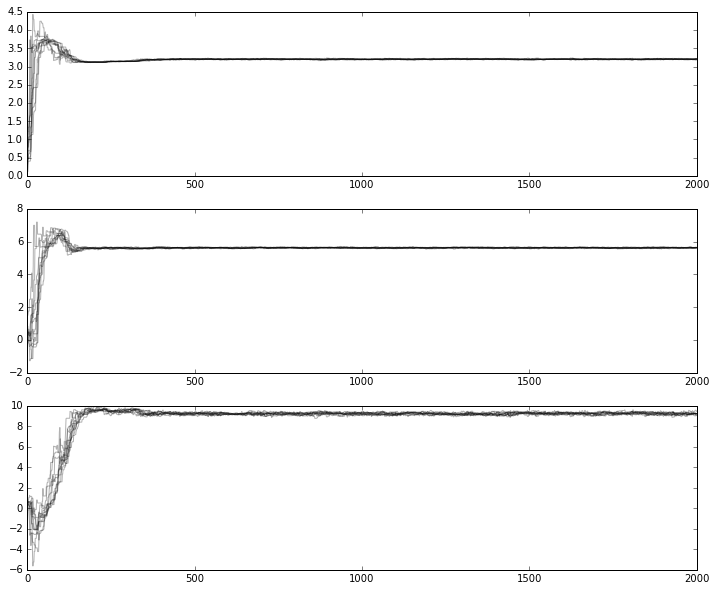

In [142]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(311)
ax.plot(sampler.chain[:,:,0].T, '-', color='k', alpha=0.3)
ax = fig.add_subplot(312)
ax.plot(sampler.chain[:,:,1].T, '-', color='k', alpha=0.3)
ax = fig.add_subplot(313)
ax.plot(sampler.chain[:,:,2].T, '-', color='k', alpha=0.3)

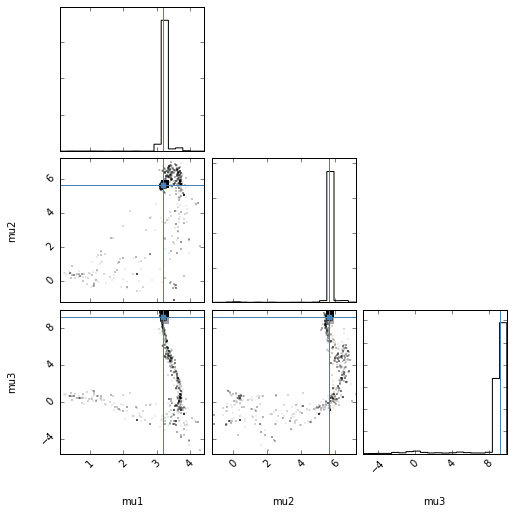

In [143]:
fig = corner.corner(sampler.flatchain, labels=["p0", "p1", "p2"],
                    truths=p)

In [144]:
sampler.reset()
pos,prob,state = sampler.run_mcmc(pos, 2000)

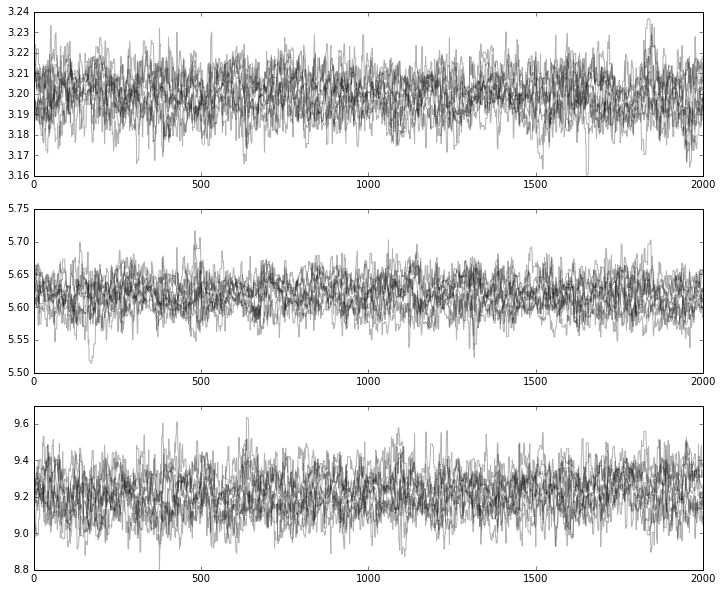

In [145]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(311)
ax.plot(sampler.chain[:,:,0].T, '-', color='k', alpha=0.3)
ax = fig.add_subplot(312)
ax.plot(sampler.chain[:,:,1].T, '-', color='k', alpha=0.3)
ax = fig.add_subplot(313)
ax.plot(sampler.chain[:,:,2].T, '-', color='k', alpha=0.3)

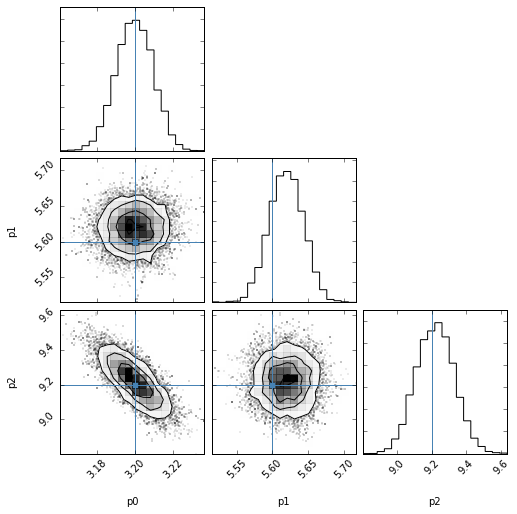

In [149]:
fig = corner.corner(sampler.flatchain, labels=["p0", "p1", "p2"],
                    truths=p)

## comparison with the results from optimization

In [153]:
# truth
p

[3.2, 5.6, 9.2]

In [154]:
# MCMC results
np.percentile(sampler.flatchain, [15., 50., 85.], axis=0)

[array([ 3.18955843,  5.59475003,  9.10662663]),
 array([ 3.19971673,  5.61938701,  9.22096255]),
 array([ 3.2097329 ,  5.64436098,  9.3336791 ])]

In [157]:
print result.x - hess_err
print result.x
print result.x + hess_err

[ 3.19186496  5.60038727  9.14575811]
[ 3.20011421  5.61993231  9.22138549]
[ 3.20836346  5.63947734  9.29701286]
